# Wordcloud, Keywords

## Imports

In [95]:
import os
import yake

from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vkvvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stopword

In [96]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "rue", "très", "leur", "leurs", "grand", "rue", 
       "quelques", "heures", "alors", "cependant", "car", "sait","elles", "etc", "trop", "quand", "parce",
       "voici", "seulement", "plusieurs", "jamais", "devant", "mieux", "jean", "devant", "peu",
       "assez", "aucun", "aucune", "bruxelles", "chaque", "beaucoup", "surtout", "enfin", "toute", "francs",
       "ensuite", "ceux", "celui", "avant", "puis", "jour", "soir", "ans", "mois", "déjà",
       "dès", "oui", "mis", "fit", "chez", "hui", "mme", "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche",
       "vient", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre",
       "font", "grande", "voir", "laquelle", "vers", "saint", "belgique" ]
sw = set(sw)

# Création d'un fichier contenant le texte de tous les journaux

In [97]:
# Lister les fichiers
data_path = '../tp4/data'
txt_path = '../tp4/data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f))]

In [98]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [99]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

407

In [100]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../tp4/data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'protection.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [101]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'protection.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"mmm me LE ORABEAU ROUGE La Bataille Ouvrière LA GREVE DE « LA CHAUSSURE v A FOREST Les ouvriwrei «t ouvriers continuent, avec la mutne unanimité «t la même volonté tenue de triompher, le mouvement déclenché par le patron. Nous pouvons même considérer que le terme « grève » ne s'applique pus exactement à ce mouvement. 11 s agit plutôt d'un « lock-out » puisque la Vï* rectum de La Société « La Chaussure » a renvoyé son personnel, n'autorisant la rentroe que lorsque celui-ci reconnaîtrait n avoir a"

## Nettoyage du fichier

In [102]:
def clean_text(folder=None):
    if folder is None:
        input_path = f"protection.txt"
        output_path = f"protection_clean.txt"
    else:
        input_path = f"{folder}/protection.txt"
        output_path = f"{folder}/protection_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [103]:
clean_text(folder=temp_path)

'Output has been written in ../tp4/data/tmp/protection_clean.txt!'

In [104]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'protection_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'mmm orabeau rouge bataille ouvrière greve chaussure forest ouvriwrei ouvriers continuent mutne unanimité volonté tenue triompher mouvement déclenché patron pouvons considérer terme grève applique pus exactement mouvement agit plutôt lock out puisque rectum société chaussure renvoyé personnel autorisant rentroe lorsque reconnaîtrait droit demander raisons lesquelles contra maître syumqué brusquement révoqué grève look out terme importance secondaire essentiel personnel tient fermement position ef'

# Nuage de mots

## Affichage des termes les plus fréquents

In [105]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('gouvernement', 1794), ('prix', 1778), ('lieu', 1712), ('temps', 1608), ('pays', 1541), ('paris', 1519), ('société', 1393), ('ministre', 1361), ('maison', 1351), ('loi', 1308)]


### Création, stockage et affichage du nuage de mots

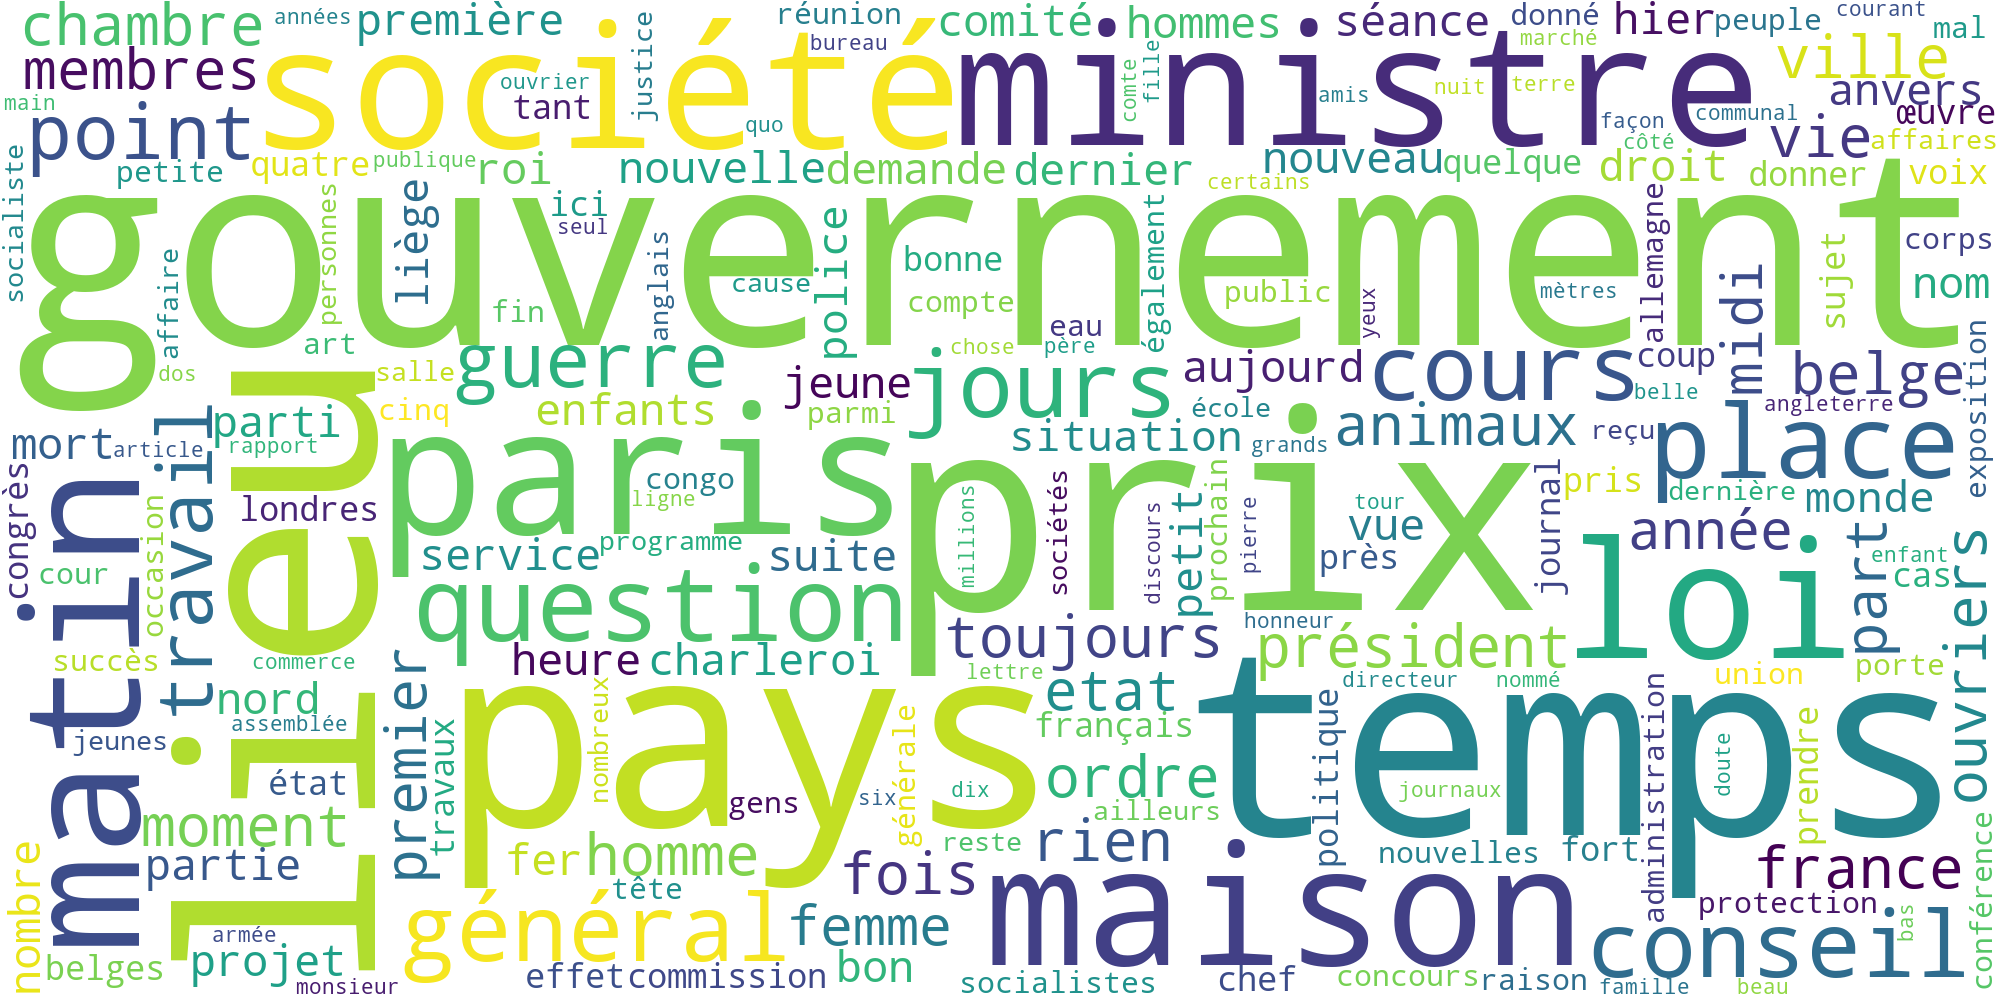

In [106]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"protection.png"))
Image(filename=os.path.join(temp_path, f"protection.png"))

# Extraction des mots clés

In [62]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [63]:
# Lister les Fichiers
data_path = "../tp4/data/tmp"
files = os.listdir(data_path)

In [66]:
# Choisir un fichier
this_file = files[0]
this_file

'protection.txt'

In [68]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"mmm me LE ORABEAU ROUGE La Bataille Ouvrière LA GREVE DE « LA CHAUSSURE v A FOREST Les ouvriwrei «t ouvriers continuent, avec la mutne unanimité «t la même volonté tenue de triompher, le mouvement déclenché par le patron. Nous pouvons même considérer que le terme « grève » ne s'applique pus exactement à ce mouvement. 11 s agit plutôt d'un « lock-out » puisque la Vï* rectum de La Société « La Chaussure » a renvoyé son personnel, n'autorisant la rentroe que lorsque celui-ci reconnaîtrait n avoir a"

In [69]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('BRUXELLES', 3.729529343859906e-06),
 ("c'est", 6.662922466248786e-06),
 ("Belgique d'une société", 8.430816869091806e-06),
 ('Belgique', 8.93148490572849e-06),
 ("qu'il", 9.007319595128687e-06),
 ('Paris', 9.465459372131573e-06),
 ('Anvers Anvers bruxelle', 9.647097149933593e-06),
 ('rue', 1.0541069239239404e-05),
 ('Société belge', 1.0788354152811507e-05),
 ('Société', 1.1386836309383505e-05),
 ('rue Jules Van', 1.1872134780552225e-05),
 ("c'est parce qu'il", 1.2306857271079686e-05),
 ('Société royale', 1.334143909720032e-05),
 ("d'un", 1.3473538151069634e-05),
 ('Bruxelles lots Bruxelles', 1.3527353841341264e-05),
 ('Van', 1.3655522396009042e-05),
 ('heures', 1.3792602852663244e-05),
 ('Société royale protectrice', 1.458791143159095e-05),
 ('France', 1.4708175517324769e-05),
 ('faire', 1.4919764696941733e-05),
 ("d'une", 1.5171733443973069e-05),
 ("C'est alors qu'il", 1.5547263803037326e-05),
 ("d'un grand nombre", 1.580704251627309e-05),
 ('Chambre', 1.621095506867862e-05),
 ("d'

In [70]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Société belge',
 'Société royale',
 'Conseil communal',
 'sociétés belges',
 'grand nombre',
 'Paris Paris',
 'gouvernement belge',
 'JEUNE HOMME',
 "cours d'une",
 'Congo belge']